In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [3]:
mat = loadmat(r'C:\Users\architect shraddha.k\Desktop\ml\machine-learning-ex4\ex4\ex4data1')
mat1 = loadmat(r'C:\Users\architect shraddha.k\Desktop\ml\machine-learning-ex4\ex4\ex4weights')
X =  mat['X']
X = X.reshape((5000,400))
Y = mat['y']
X, Y = shuffle(X, Y)
train_target = np.zeros((3000,10),dtype=int)
train = X[0:3000,:]
cross_validation = X[3000:4000,:]
test = X[3000:4000,:]
for i in range(0,train_target.shape[0]):
    value = Y[i]
    if value==10:
        train_target[i][0]=1
    else:
         train_target[i][value]=1       

In [4]:
def parameters(dim):
    w1 = np.random.randn(25,dim) * 0.01
    b1 = np.zeros((25,1),dtype=int)
    w2 = np.random.randn(10,25) * 0.01
    b2 = np.zeros((10,1),dtype=int)
    params = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return params

In [5]:
def sigmoid(data):
    value = (np.exp(data))/(1+(np.exp(data)))
    return value

In [6]:
def relu(Z1):
    value = np.maximum(Z1,0)
    return value

In [7]:
def forward(X,Y,params,lambd):
    m = X.shape[0]
    w1 = params['w1']
    w2 = params['w2']
    b1 = params['b1']
    b2 = params['b2']
    z1 = np.dot(X,w1.T) + b1.T
    A1 = relu(z1)
    z2 = np.dot(A1,w2.T) + b2.T
    A2 = sigmoid(z2)
    J = (1/m)*(np.sum(((np.sum((-np.multiply(Y,np.log(A2)) - np.multiply((1-Y),np.log(1-A2))),axis=1))),keepdims=True))
    regularized = (lambd/(2*m)) * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    J = J + regularized
    dz2 = A2 - Y
    dw2 = (1/m) * (np.dot(dz2.T,A1)) + ((lambd/m) * (w2))
    db2 = (1/m) * (np.sum(dz2.T,axis=1,keepdims=True))
    dz1 = np.multiply(np.dot(dz2,w2),  (A1 > 0).astype(int))
    dw1 = (1/m) * np.dot(dz1.T,X)    + ((lambd/m) * (w1))
    db1 = (1/m) * np.sum(dz1.T,axis=1,keepdims=True)
    derivative = {'dw2':dw2,'dw1':dw1,'db2':db2,'db1':db1} 
    return derivative,J

In [8]:
def backward(X,Y,iterations,alphs,lambd):
    m,n=np.shape(X)
    params = parameters(n)
    costs=[]
    for i in range(0,iterations):
        derivative,value = forward(X,Y,params,lambd)
        w1 = params['w1']
        w2 = params['w2']
        b1 = params['b1']
        b2 = params['b2']
        dw1 = derivative['dw1']
        dw2 = derivative['dw2']
        db1 = derivative['db1']
        db2 = derivative['db2']
        w1 = w1 - (alphs*dw1)
        w2 = w2 - (alphs*dw2)
        b1 = b1 - (alphs*db1)
        b2 = b2 - (alphs*db2)
        params = {'w1':w1,'b1':b1,'w2':w2,'b2':b2}
        costs.append(value)
    return params,costs
    

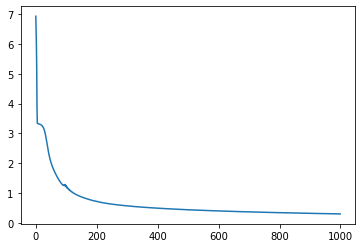

In [9]:
iterations = 1000
alpha = 0.3
lambd = 1
params,costs = backward(train,train_target,iterations,alpha,lambd)
plt.plot(range(0,iterations),costs)

In [10]:
w1 = params['w1']
w2 = params['w2']
b1 = params['b1']
b2 = params['b2']
z1 = np.dot(cross_validation,w1.T) + b1.T
A1 = relu(z1)
z2 = np.dot(A1,w2.T) + b2.T
A2 = sigmoid(z2)
maxInRows = A2.argmax(axis=1)
predict = maxInRows.reshape(cross_validation.shape[0],1)
predict[predict==0]=10
accuracy = np.mean((predict == Y[3000:4000]),axis=0)*100
print(accuracy)

[91.7]


In [15]:
clf = svm.SVC(gamma=0.001,C=100)
train_svm = X[0:3000,:]
temporary = Y.ravel()
train_svm_target = temporary[0:3000]
clf.fit(train_svm,train_svm_target)
print(clf.score(train_svm,train_svm_target))

0.9853333333333333


In [16]:
cross_validation_svm = X[3000:4000,:]
accuracy_svm = np.mean((clf.predict(cross_validation_svm) == temporary[3000:4000]),axis=0)*100
print(accuracy_svm)

91.3


In [17]:
model = tree.DecisionTreeClassifier()
train_tree = X[0:3000,:]
train_tree_target = temporary[0:3000]
model.fit(train_tree,train_tree_target)
model.score(train_tree,train_tree_target)

1.0

In [35]:
cross_validation_tree = X[3000:4000,:]
accuracy_tree = np.mean((model.predict(cross_validation_tree) == temporary[3000:4000]),axis=0)*100
print(accuracy_tree)

74.8


In [40]:
model_random_forest =   RandomForestClassifier(n_estimators=10)
train_random_forest = X[0:3000,:]
train_random_forest_target = temporary[0:3000]
model_random_forest.fit(train_random_forest,train_random_forest_target)
model_random_forest.score(train_random_forest,train_random_forest_target)

0.9996666666666667

In [41]:
cross_validation_randomForest = X[3000:4000,:]
accuracy_randomForest = np.mean((model_random_forest.predict(cross_validation_randomForest) == temporary[3000:4000]),axis=0)*100
print(accuracy_randomForest)

87.3


In [25]:
adb = AdaBoostClassifier(tree.DecisionTreeClassifier(),n_estimators=10,learning_rate=0.01)
train_boost = X[0:3000,:]
train_boost_target = temporary[0:3000]
adb.fit(train_boost,train_boost_target)
adb.score(train_boost,train_boost_target)

1.0

In [26]:
cross_validation_boost = X[3000:4000,:]
print(adb.score(cross_validation_boost,temporary[3000:4000]))

0.743


In [37]:
test_svm = X[4000:5000]
accuracy_svm_test = np.mean((clf.predict(test_svm) == temporary[4000:5000]),axis=0)*100
print(accuracy_svm_test)
cm = confusion_matrix(temporary[4000:5000],clf.predict(test_svm))

93.10000000000001


Text(69.0, 0.5, 'Truth')

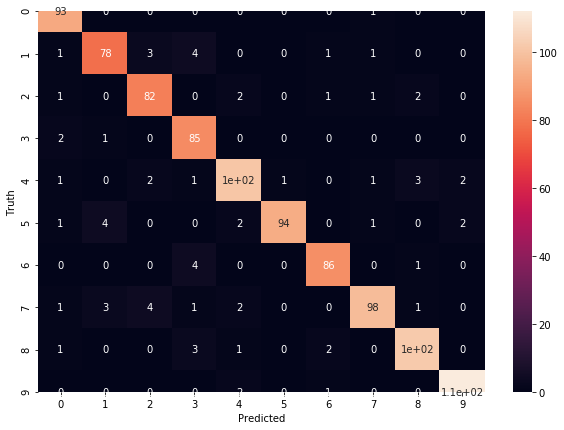

In [32]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
test_randomForest = X[4000:5000]
accuracy_randomForest_test = np.mean((clf.predict(test_randomForest) == temporary[4000:5000]),axis=0)*100
print(accuracy_randomForest_test)
cm = confusion_matrix(temporary[4000:5000],clf.predict(test_svm))

93.10000000000001


Text(69.0, 0.5, 'Truth')

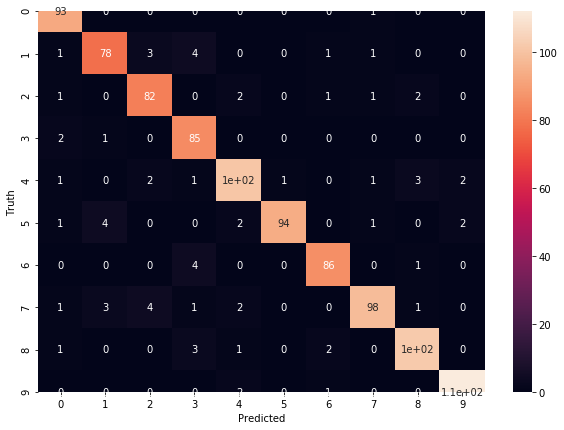

In [34]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')